In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Print the first 5 rows
print(df.head())

# Print a summary of all columns (data types, non-null counts)
print(df.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
# Check for any missing values in the entire dataset
missing_values = df.isnull().sum().max()
print(f'Total Missing Values: {missing_values}')
print('---' * 10)

# Check the distribution of the target variable 'Class'
print("Class Distribution:")
print(df['Class'].value_counts())
print('---' * 10)

# Calculate and print the percentage of fraud
total_transactions = len(df)
fraud_transactions = df[df['Class'] == 1]['Class'].count()
fraud_percentage = (fraud_transactions / total_transactions) * 100
print(f'Percentage of transactions that are fraud: {fraud_percentage:.4f}%')

Total Missing Values: 0
------------------------------
Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64
------------------------------
Percentage of transactions that are fraud: 0.1727%


Plotting feature distributions...


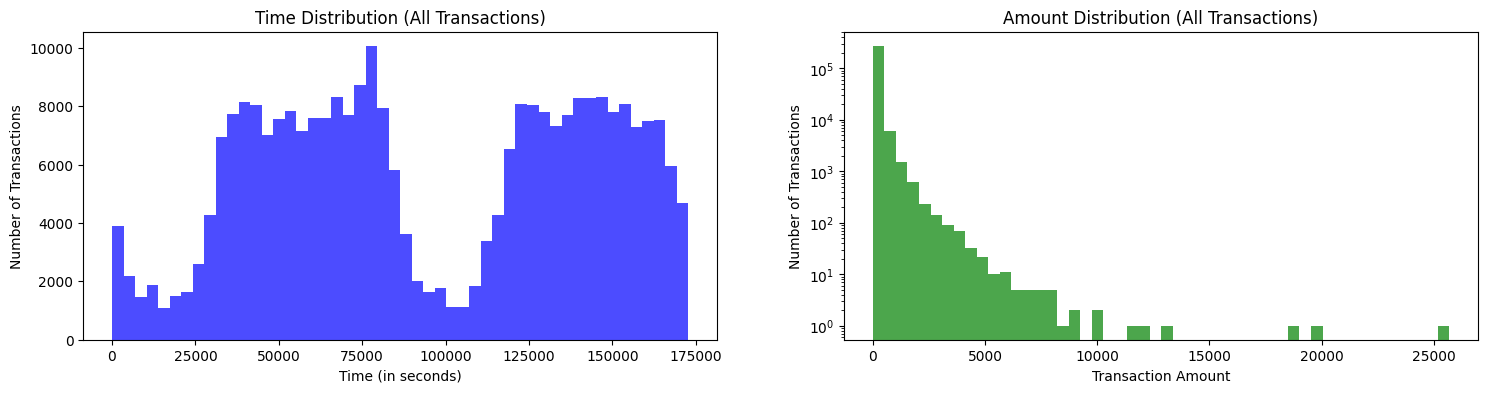

Done plotting.


In [3]:
import matplotlib.pyplot as plt

print("Plotting feature distributions...")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))

# Plot histogram for 'Time'
ax1.hist(df['Time'], bins=50, color='blue', alpha=0.7)
ax1.set_title('Time Distribution (All Transactions)')
ax1.set_xlabel('Time (in seconds)')
ax1.set_ylabel('Number of Transactions')

# Plot histogram for 'Amount'
ax2.hist(df['Amount'], bins=50, color='green', alpha=0.7)
ax2.set_title('Amount Distribution (All Transactions)')
ax2.set_xlabel('Transaction Amount')
ax2.set_ylabel('Number of Transactions')
ax2.set_yscale('log') # Use a log scale because amounts are skewed

# Show the plot
plt.show()

print("Done plotting.")

In [4]:
from sklearn.preprocessing import StandardScaler

print("Scaling 'Time' and 'Amount' columns...")

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the 'Amount' column
df['scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Fit and transform the 'Time' column
df['scaled_Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original columns
df = df.drop(['Time', 'Amount'], axis=1)

print("Original columns dropped and scaled columns added.")

# Print the head to see the changes
print(df.head())

Scaling 'Time' and 'Amount' columns...
Original columns dropped and scaled columns added.
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0